## Tạo chồng chập (H)

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt

print("Armor loaded!")

Armor loaded!


In [2]:
# 1. Create a circuit with 2 Qubits
qc = QuantumCircuit(2)

# 2. "Inspect" the state vector before doing anything
state_initial = Statevector.from_instruction(qc)
print("Initial state (Vector):")
print(state_initial)

Initial state (Vector):
Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


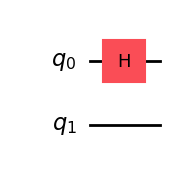

In [3]:
# Apply H to qubit 0
qc.h(0)

# Draw the circuit
qc.draw('mpl')

## Gộp/Vướng víu (CNOT)

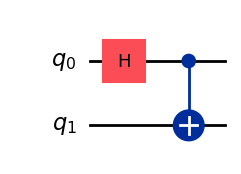

In [4]:
# Apply CNOT: Qubit 0 as Control (dot), Qubit 1 as Target (plus sign)
qc.cx(0, 1)

# Redraw the circuit
qc.draw('mpl')

## Soi kết quả vector

Final state vector: 
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


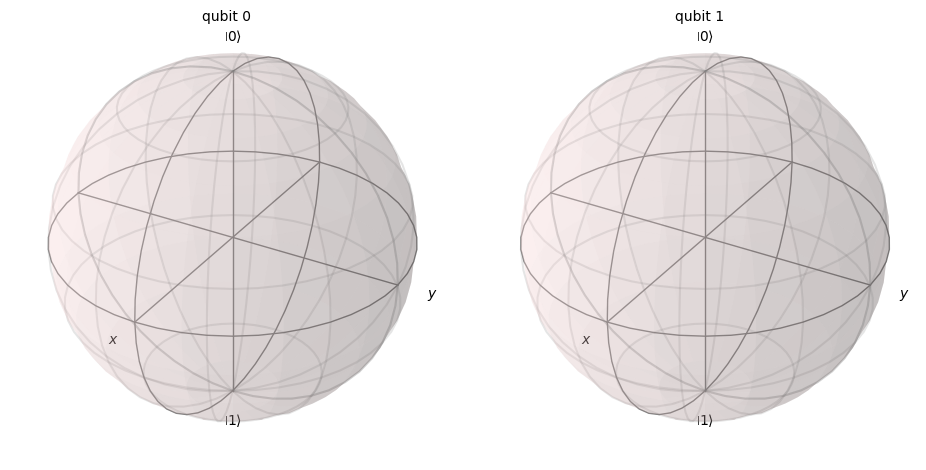

In [5]:
final_state = Statevector.from_instruction(qc)
print("Final state vector: ")
print(final_state)

# Displayed on the Bloch Bridge (You will see two indistinct arrows)
plot_bloch_multivector(final_state)

## Đo đạc

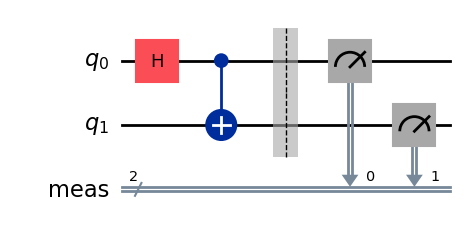

In [6]:
# Measure all qubits
qc.measure_all()

# Draw the complete circuit (including the multimeter)
qc.draw('mpl')

## Xem kết quả thực tế

Counting result: {'11': 513, '00': 511}


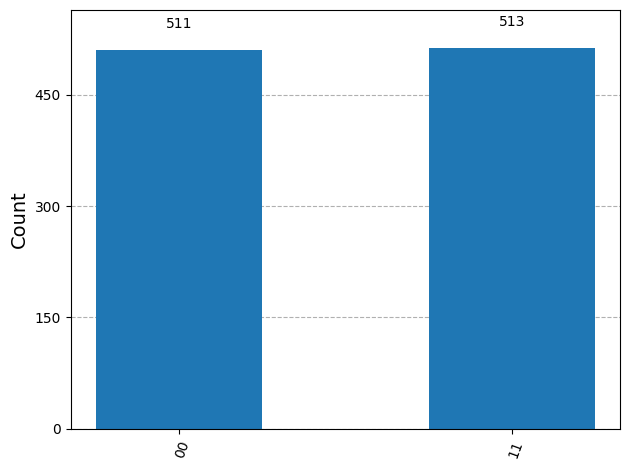

In [8]:
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram

# 1. Prepare mock setup
sampler = StatevectorSampler()

# 2. Run circuit (Test 1024 shots)
job = sampler.run([qc])
result = job.result()

# 3. Get statistics (Counts)
counts = result[0].data.meas.get_counts()

print("Counting result:", counts)

# 4. Plot bar chart
plot_histogram(counts)

# Day 1: Quantum Entanglement

## Mathematical Formula
We have created the **Bell State** ($\Phi^+$) using the H+ CNOT circuit:

$$

|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}
$$

This explains why the measurement results are approximately **50% 00** and **50% 11**.

## CLASSICAL LOGIC


--- EXPERIMENT 2: CLASSICAL LOGIC (X Gate + CNOT) ---
Result of experiment 2: {'11': 1024}


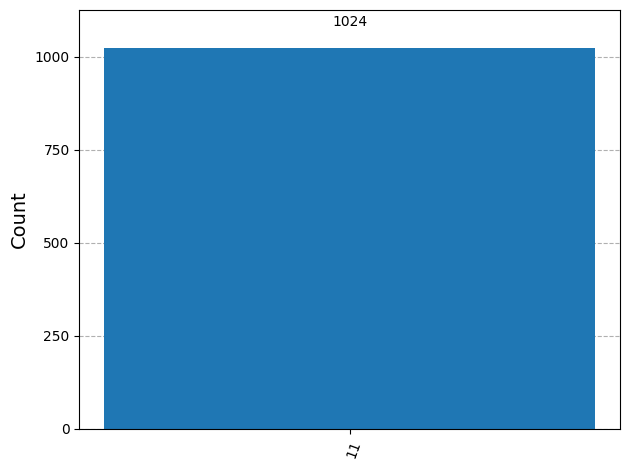

In [9]:
print("\n--- EXPERIMENT 2: CLASSICAL LOGIC (X Gate + CNOT) ---")
# 1. Create a new circuit
qc_classical = QuantumCircuit(2)

# 2. Instead of using H, we use X (Classical NOT Gate) on qubit 0
# Logic: |00> -> X -> |10>
qc_classical.x(0)

# 3. Still using CNOT
# Logic: Control is 1 (because it has been flipped), so it will FLIP Target.

# |10> -> CNOT -> |11>
qc_classical.cx(0, 1)

# 4. Measure
qc_classical.measure_all()

# 5. Run simulation
job_2 = sampler.run([qc_classical])
result_2 = job_2.result()
counts_2 = result_2[0].data.meas.get_counts()

print("Result of experiment 2:", counts_2)
plot_histogram(counts_2)